# **Neutrino Oscillation with DUNE**

## PHYS591000 Physics AI Final Project

This is the project implementing ML to find out the $\Theta_{13}$ and $\delta_{cp}$ using the neutrino data from DUNE experiment.  
Original link: [Kaggle](https://www.kaggle.com/competitions/phys591000-2023-final-project-i)

> Author(s): Siang-Yuan Lin, Yuan-Yen Peng  
> Email(s) : sylin@gapp.nthu.edu.tw, garyphys0915@gapp.nthu.edu.tw  
> Licence : MIT  
> Data : May, 2023


### prerequisites

1. reset all varialbes
2. import curcial modules
3. mount google drive
4. check the GPU is on


In [1]:
%reset -f # clear all variables

Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  clear, please run `%reset?` for details
Don't know how to reset  all, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details


In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

from numba import njit  # acceleration kernel
import concurrent.futures # parallel execution
import tensorflow as tf

In [3]:
# # mount the google drive to retrieve dataset

# from google.colab import drive

# drive.mount('/content/drive')


In [4]:
# check the tensorflow and GPU

print(f"Using Tensorflow {tf.__version__}")
device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")
print(
    f"Found GPU adn CPU.\nTensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}"
)

Using Tensorflow 2.9.0
Metal device set to: Apple M1
Found GPU adn CPU.
TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-05-18 10:43:16.604974: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-18 10:43:16.605729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### import datasets

1. check files exist
2. retrieve data
3. check shapes of data


In [5]:
# import the datasets and check the files

import os

path = "./phys591000-2023-final-project/"  # run on the local machine
# path = "/content/drive/Shareddrives/2023AI_final/2023AI_final/phys591000-2023-final-project/" # run on the google colab
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        print("-> The file is", filename)
if not os.path.isfile(path + "neutrino_test_data.npz") or os.path.isfile(
    path + "neutrino_train_data.npz"
):
    raise FileNotFoundError("test/train data was not found or is a directory")

FileNotFoundError: test/train data was not found or is a directory

In [ ]:
%%time
# take out data from the datasets

data_train = np.load(path + "neutrino_training_data.npz")  # ideal data
data_test = np.load(path + "neutrino_test_data.npz")  # pseudo-exp data

name_train = data_train.files
name_test = data_test.files

print(f"Train: {name_train}")
print(f"Test : {name_test}")

# Create a ThreadPoolExecutor with the maximum number of worker threads
with concurrent.futures.ThreadPoolExecutor() as executor:
    ve_train, vebar_train, vu_train, vubar_train, theta23_train, delta_train, ldm_train = executor.map(lambda n: data_train[n], name_train)
    ve_test, vebar_test, vu_test, vubar_test = executor.map(lambda n: data_test[n], name_test)


Train: ['ve', 'vebar', 'vu', 'vubar', 'theta23', 'delta', 'ldm']
Test : ['ve', 'vebar', 'vu', 'vubar']
CPU times: user 14.7 s, sys: 874 ms, total: 15.6 s
Wall time: 16.5 s


In [ ]:
# check the data shape

print(
    f"""# TRAIN
ve_train     :{ve_train.shape}
vebar_train  :{vebar_train.shape}
vu_train     :{vu_train.shape}
vubar_train  :{vubar_train.shape}
theta23_train:{theta23_train.shape}
delta_train  :{delta_train.shape}
ldm_train    :{ldm_train.shape}
"""
)
print(
    f"""# TEST
ve_test      :{ve_test.shape}
vebar_test   :{vebar_test.shape}
vu_test      :{vu_test.shape}
vubar_test   :{vubar_test.shape}
"""
)

# TRAIN
ve_train     :(1000000, 65)
vebar_train  :(1000000, 65)
vu_train     :(1000000, 65)
vubar_train  :(1000000, 65)
theta23_train:(1000000,)
delta_train  :(1000000,)
ldm_train    :(1000000,)

# TEST
ve_test      :(1000, 65)
vebar_test   :(1000, 65)
vu_test      :(1000, 65)
vubar_test   :(1000, 65)



### preprocessing

1. checking histograms
2. denoise <TODO>
3. splite train/test data
4. <TODO>


In [ ]:
# check histograms

def four_plot(data_format: list) -> None:
    train, test = data_format
    bins = np.arange(0.625, 8 + 0.125, 0.125)
    name = [r"$\nu_e$", r"$\bar{\nu}_e$", r"$\nu_\mu$", r"$\bar{\nu}_\mu$"]
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10), dpi=100, constrained_layout=True)
    fig.suptitle("First 60 features")
    for i, (train_data, test_data, name) in enumerate(zip(train, test, name_format)):
        ax = axes[i // 2, i % 2]
        ax.set_title(name)
        ax.step(bins, train_data[:60], label="train")
        ax.step(bins, test_data[:60], label="test")
        ax.legend(loc="best")
        ax.set_xlabel("Energy E [GeV]")
        ax.set_ylabel(r"Flux density $\phi [kg\cdot s^{-1}\cdot m^{-2}]$")

    plt.show()
    print("Success to plot")
    return

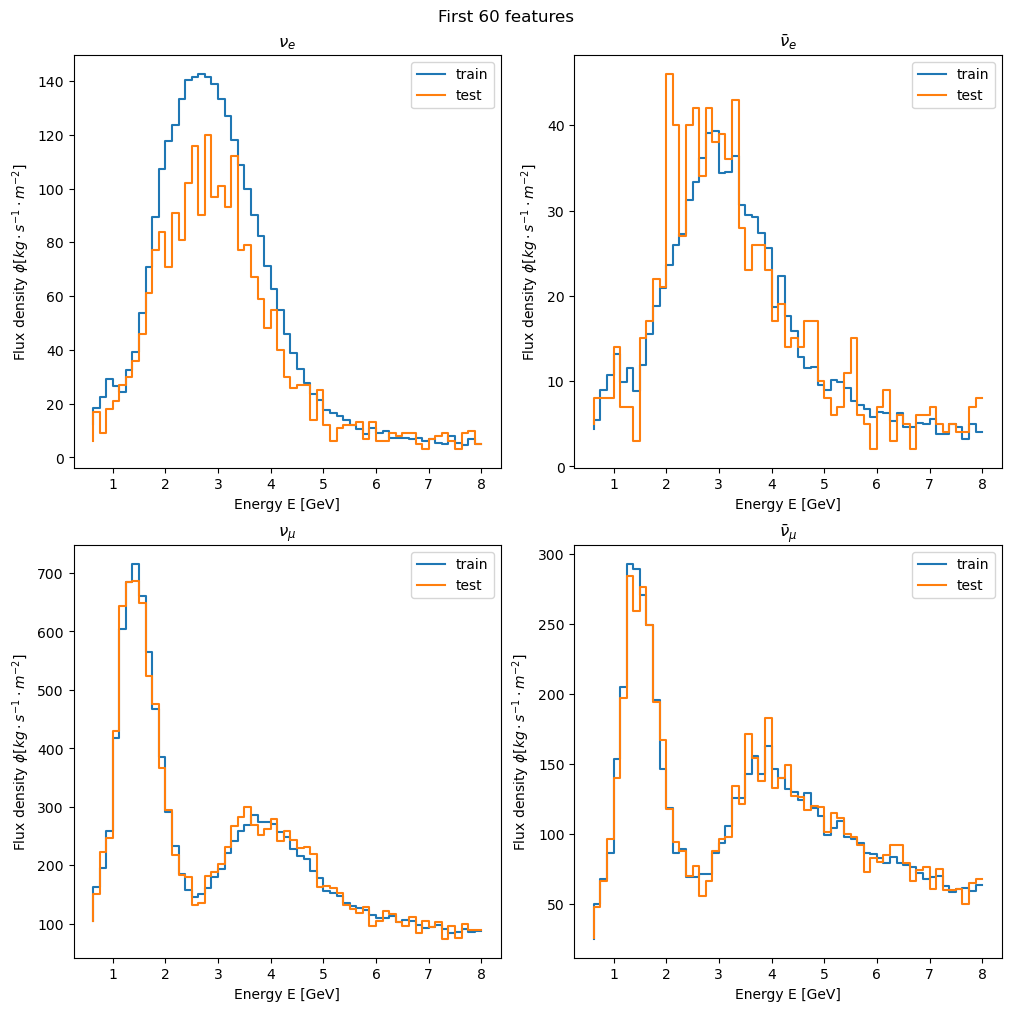

Success to plot


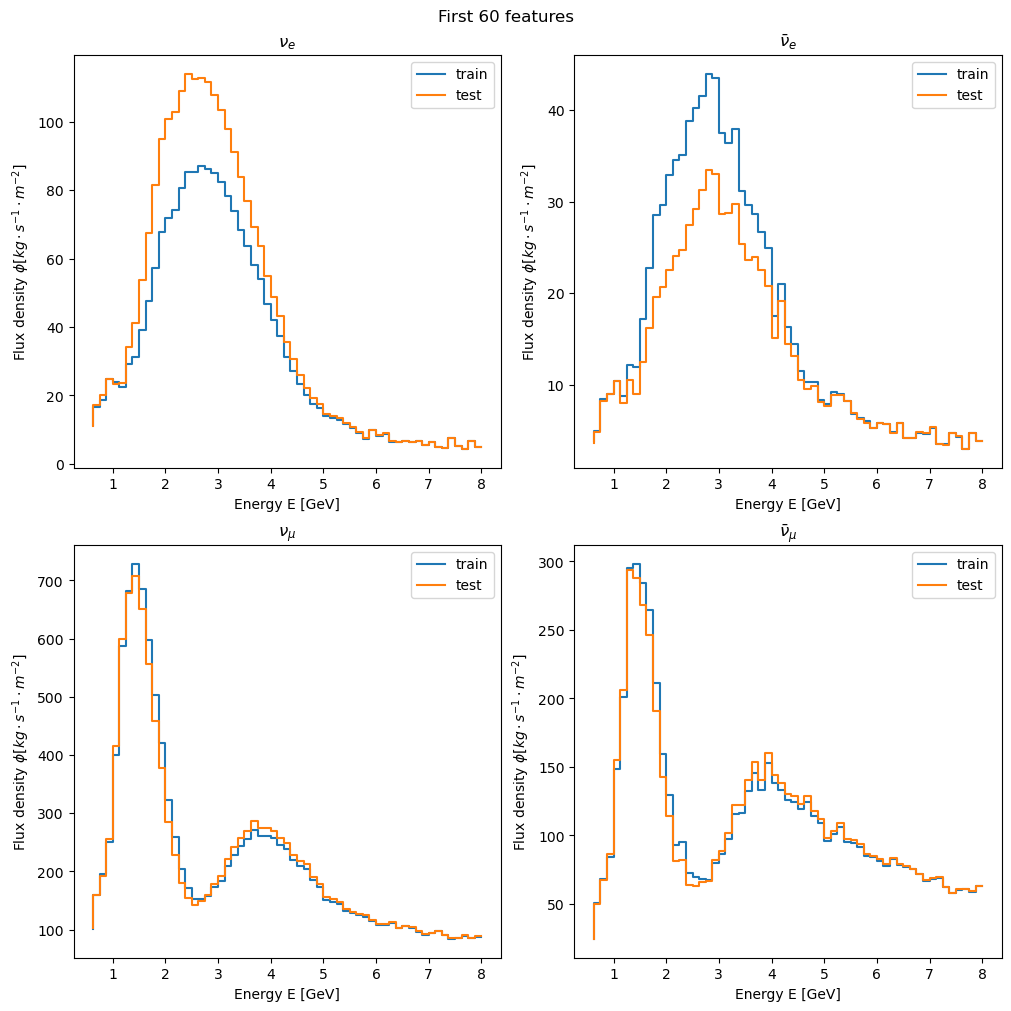

Success to plot


In [ ]:
train = [ve_train[10], vebar_train[10], vu_train[10], vubar_train[10]]
test = [ve_test[10], vebar_test[10], vu_test[10], vubar_test[10]]
train_average = [
    np.average(ve_train, axis=0),
    np.average(vebar_train, axis=0),
    np.average(vu_train, axis=0),
    np.average(vubar_train, axis=0),
]
test_average = [
    np.average(ve_test, axis=0),
    np.average(vebar_test, axis=0),
    np.average(vu_test, axis=0),
    np.average(vubar_test, axis=0),
]
data_format = [train, test]
data_sum_format = [train_average, test_average]

four_plot(data_format, name)
four_plot(data_sum_format, name)


In [ ]:
# create validation data

from sklearn.model_selection import train_test_split

x_train = np.stack([ve_train, vebar_train, vu_train, vubar_train], axis=-1)
y_train = np.stack([theta23, delta, ldm], axis=-1)
x_test = np.stack([ve_test, vebar_test, vu_test, vubar_test], axis=-1)

# split the training dataset into training and validation, with test_size = 0.2
tf.random.set_seed(2023)
x_train, y_train, x_val, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)